# World GDP For West Africa Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv('gdp_csv.csv')

In [2]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [3]:
df.tail()

,Country Name,Country Code,Year,Value
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10
11506,Zimbabwe,ZWE,2016,1.661996e+10


In [4]:
# Filter data for countries in Africa
africa_df = df[df['Country Name'].str.contains('Africa')]

In [5]:
# 1. What are the unique country names in Africa?
unique_countries = africa_df['Country Name'].unique()
print("Unique country names in Africa:", unique_countries)

Unique country names in Africa: ['Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)'
 'Sub-Saharan Africa (IDA & IBRD countries)' 'Central African Republic'
 'South Africa']


In [6]:
# 2. What is the maximum value recorded in Africa?
max_value = africa_df['Value'].max()
print("Maximum value in Africa:", max_value)

Maximum value in Africa: 3563559183199.12


In [7]:
# 3. How many unique country codes are there in Africa?
unique_country_codes = africa_df['Country Code'].nunique()
print("Number of unique country codes in Africa:", unique_country_codes)

Number of unique country codes in Africa: 8


In [8]:
# 4. What is the average value in Africa?
average_value = africa_df['Value'].mean()
print("Average value in Africa:", average_value)

Average value in Africa: 461319857544.2016


Number of years available for countries in Africa: 57


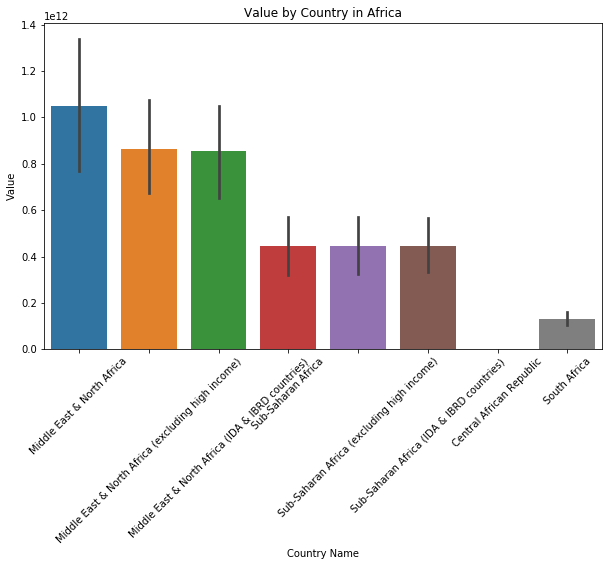

In [9]:
# 5. How many years of data are available for countries in Africa?
years_available = africa_df['Year'].nunique()
print("Number of years available for countries in Africa:", years_available)

# Bar plot: Value by Country in Africa
plt.figure(figsize=(10, 6))
sns.barplot(data=africa_df, x='Country Name', y='Value')
plt.title("Value by Country in Africa")
plt.xlabel("Country Name")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [18]:
# 6. What is the value for a specific country in Africa (e.g., 'Nigeria') in the year 1974?
country = 'Guinea'
year = 1974

country_data = africa_df[(africa_df['Country Name'] == country) & (africa_df['Year'] == year)]

if not country_data.empty:
    value_1974 = country_data['Value'].item()
    print("Value for", country, "in", year, ":", value_1974)
else:
    print("No data available for", country, "in", year)


No data available for Guinea in 1974


In [22]:
# 7. Which country in Africa had the highest value in a specific year (e.g., 1969)?
year = 1969

year_data = africa_df[africa_df['Year'] == year]

if not year_data.empty:
    country_with_highest_value = year_data.loc[year_data['Value'].idxmax(), 'Country Name']
    print("Country in Africa with the highest value in", year, ":", country_with_highest_value)
else:
    print("No data available for the specified year in Africa.")


Country in Africa with the highest value in 1969 : Sub-Saharan Africa


Total value by country in Africa:
 Country Name
Central African Republic                              5.258429e+10
Middle East & North Africa                            5.141231e+13
Middle East & North Africa (IDA & IBRD countries)     2.055844e+13
Middle East & North Africa (excluding high income)    2.071490e+13
South Africa                                          7.485296e+12
Sub-Saharan Africa                                    2.534178e+13
Sub-Saharan Africa (IDA & IBRD countries)             2.534178e+13
Sub-Saharan Africa (excluding high income)            2.531708e+13
Name: Value, dtype: float64


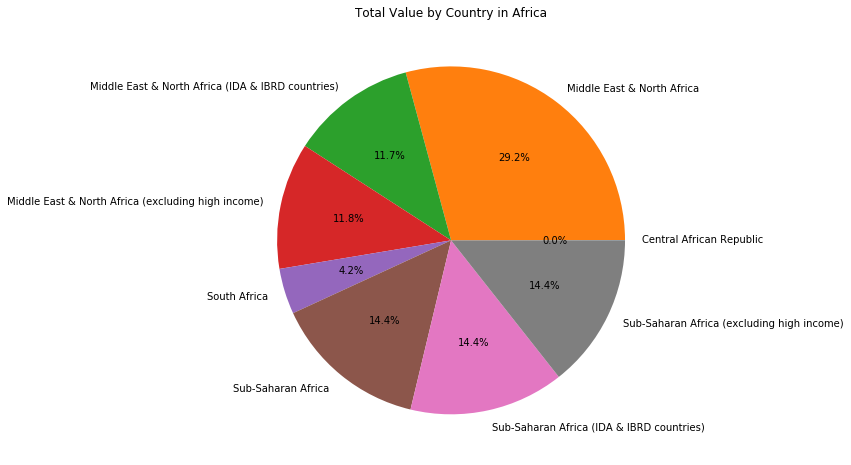

In [13]:
# 8. What is the total value for each country in Africa?
total_value_by_country = africa_df.groupby('Country Name')['Value'].sum()
print("Total value by country in Africa:\n", total_value_by_country)

# Pie chart: Total Value by Country in Africa
plt.figure(figsize=(8, 8))
country_labels = total_value_by_country.index
country_values = total_value_by_country.values
plt.pie(country_values, labels=country_labels, autopct='%1.1f%%')
plt.title("Total Value by Country in Africa")
plt.show()

In [28]:
# 9. What is the value for a specific country in Africa (e.g., 'Egypt') in each year?
country = 'Guinea'

country_data = africa_df[africa_df['Country Name'] == country]

if not country_data.empty:
    value_by_year_for_country = country_data[['Year', 'Value']]
    print("Value for", country, "in each year in Africa:\n", value_by_year_for_country)

    # Line plot: Value by Year for a specific country in Africa
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=value_by_year_for_country, x='Year', y='Value')
    plt.title("Value by Year for " + country + " in Africa")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.show()
else:
    print("No data available for the specified country in Africa.")


No data available for the specified country in Africa.


In [17]:
# 10. Is there any missing data (NaN) in the dataset for countries in Africa?
missing_data = africa_df.isnull().values.any()
print("Missing data in the dataset for countries in Africa:", missing_data)

Missing data in the dataset for countries in Africa: False


## Focus On West Africa Only

In [29]:
# Filter the dataset for West Africa countries
west_africa_countries = ['Nigeria', 'Ghana', 'Senegal', 'Cote d\'Ivoire', 'Mali']
west_africa_df = df[df['Country Name'].isin(west_africa_countries)]

In [40]:
# 1. Which West African country had the highest value in a specific year (e.g., 1990)?
year = 2000
year_data = west_africa_df[west_africa_df['Year'] == year]

if not year_data.empty:
    country_with_highest_value = year_data.loc[year_data['Value'].idxmax(), 'Country Name']
    print("West African country with the highest value in", year, ":", country_with_highest_value)
else:
    print("No valid data available for the specified year and West African countries.")


West African country with the highest value in 2000 : Nigeria


Average value by West African country:
 Country Name
Cote d'Ivoire    1.109746e+10
Ghana            1.020583e+10
Mali             4.121091e+09
Nigeria          9.262515e+10
Senegal          5.313464e+09
Name: Value, dtype: float64


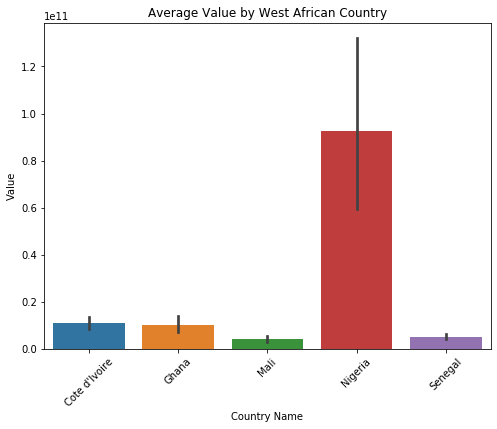

In [32]:
# 2. What is the average value for each West African country?
average_value_by_country = west_africa_df.groupby('Country Name')['Value'].mean()
print("Average value by West African country:\n", average_value_by_country)

# Bar plot: Average Value by West African Country
plt.figure(figsize=(8, 6))
sns.barplot(data=west_africa_df, x='Country Name', y='Value')
plt.title("Average Value by West African Country")
plt.xlabel("Country Name")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


Total value by year in West Africa:
 Year
1960    6.752351e+09
1961    7.224613e+09
1962    7.794529e+09
1963    8.353721e+09
1964    9.144328e+09
1965    9.803492e+09
1966    1.050214e+10
1967    9.293346e+09
1968    9.527152e+09
1969    1.128113e+10
1970    1.760097e+10
1971    1.467122e+10
1972    1.800306e+10
1973    2.217238e+10
1974    3.300822e+10
1975    3.754934e+10
1976    4.694228e+10
1977    4.886053e+10
1978    5.190475e+10
1979    6.524518e+10
1980    8.408560e+10
1981    7.844727e+10
1982    6.744400e+10
1983    5.041899e+10
1984    4.369320e+10
1985    4.471037e+10
1986    4.164943e+10
1987    4.638702e+10
1988    4.587937e+10
1989    4.633523e+10
1990    5.584066e+10
1991    5.282343e+10
1992    5.570334e+10
1993    4.129813e+10
1994    3.780356e+10
1995    5.359739e+10
1996    6.190842e+10
1997    6.180540e+10
1998    6.004832e+10
1999    6.455030e+10
2000    6.971979e+10
2001    6.898837e+10
2002    8.685372e+10
2003    1.021573e+11
2004    1.267570e+11
2005    1.550

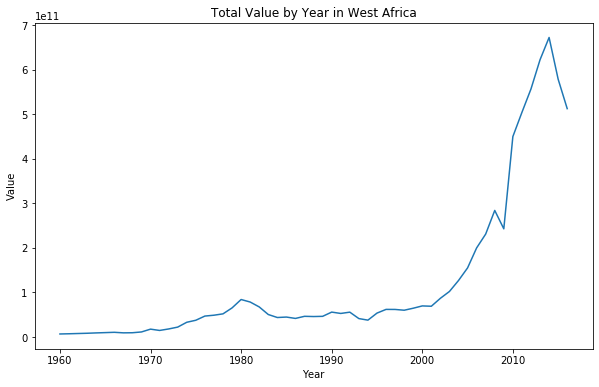

In [41]:
# 3. What is the total value for each year in West Africa?
total_value_by_year = west_africa_df.groupby('Year')['Value'].sum()
print("Total value by year in West Africa:\n", total_value_by_year)

# Line plot: Total Value by Year in West Africa
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_value_by_year)
plt.title("Total Value by Year in West Africa")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


## Go Down To Nigeria and Ghana

In [68]:
# Filter data for Nigeria
nigeria_data = west_africa_df[west_africa_df['Country Name'] == 'Nigeria']
nigeria_data.head()

,Country Name,Country Code,Year,Value
8420,Nigeria,NGA,1960,4.196092e+09
8421,Nigeria,NGA,1961,4.467200e+09
8422,Nigeria,NGA,1962,4.909303e+09
8423,Nigeria,NGA,1963,5.165489e+09
8424,Nigeria,NGA,1964,5.552822e+09


In [70]:
# 1. What are the unique years available for Nigeria?
nigeria_unique_years = nigeria_data['Year'].unique()
print("Unique years available for Nigeria:", nigeria_unique_years)


Unique years available for Nigeria: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]


In [65]:
# 2. What is the total value for each year in Nigeria?
nigeria_total_value_by_year = nigeria_data.groupby('Year')['Value'].sum()
print("Total value by year in Nigeria:\n", nigeria_total_value_by_year)


Total value by year in Nigeria:
 Year
1960    4.196092e+09
1961    4.467200e+09
1962    4.909303e+09
1963    5.165489e+09
1964    5.552822e+09
1965    5.874423e+09
1966    6.366793e+09
1967    5.203136e+09
1968    5.200896e+09
1969    6.634187e+09
1970    1.254585e+10
1971    9.181770e+09
1972    1.227442e+10
1973    1.516287e+10
1974    2.484664e+10
1975    2.777893e+10
1976    3.630888e+10
1977    3.603541e+10
1978    3.652786e+10
1979    4.725991e+10
1980    6.420179e+10
1981    6.107649e+10
1982    5.139746e+10
1983    3.545157e+10
1984    2.850082e+10
1985    2.887398e+10
1986    2.072150e+10
1987    2.409320e+10
1988    2.327216e+10
1989    2.423117e+10
1990    3.075708e+10
1991    2.739289e+10
1992    2.930090e+10
1993    1.578900e+10
1994    1.808640e+10
1995    2.854696e+10
1996    3.498795e+10
1997    3.582234e+10
1998    3.200461e+10
1999    3.587079e+10
2000    4.638601e+10
2001    4.413799e+10
2002    5.911685e+10
2003    6.765581e+10
2004    8.784542e+10
2005    1.122484e

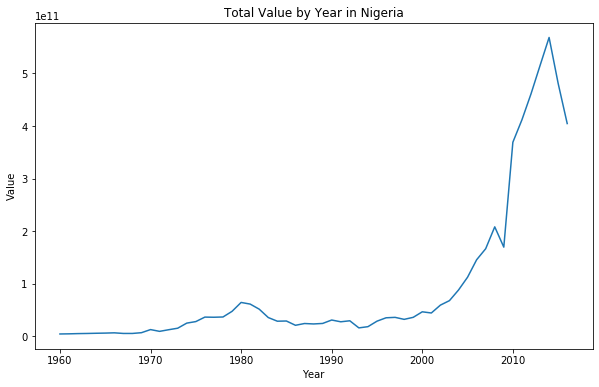

In [67]:
# Line plot: Total Value by Year in Nigeria
plt.figure(figsize=(10, 6))
plt.plot(nigeria_total_value_by_year.index, nigeria_total_value_by_year.values)
plt.title("Total Value by Year in Nigeria")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


In [71]:
# Filter data for Ghana
ghana_data = west_africa_df[west_africa_df['Country Name'] == 'Ghana']
ghana_data

,Country Name,Country Code,Year,Value
5444,Ghana,GHA,1960,1.217230e+09
5445,Ghana,GHA,1961,1.302674e+09
5446,Ghana,GHA,1962,1.382516e+09
5447,Ghana,GHA,1963,1.540798e+09
5448,Ghana,GHA,1964,1.731296e+09
5449,Ghana,GHA,1965,2.053463e+09
5450,Ghana,GHA,1966,2.126301e+09
5451,Ghana,GHA,1967,1.747188e+09
5452,Ghana,GHA,1968,1.666910e+09
5453,Ghana,GHA,1969,1.962051e+09


In [72]:
# 3. What are the unique years available for Ghana?
ghana_unique_years = ghana_data['Year'].unique()
print("Unique years available for Ghana:", ghana_unique_years)

Unique years available for Ghana: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]


Total value by year in Ghana:
 Year
1960    1.217230e+09
1961    1.302674e+09
1962    1.382516e+09
1963    1.540798e+09
1964    1.731296e+09
1965    2.053463e+09
1966    2.126301e+09
1967    1.747188e+09
1968    1.666910e+09
1969    1.962051e+09
1970    2.215029e+09
1971    2.417109e+09
1972    2.112293e+09
1973    2.465493e+09
1974    2.894410e+09
1975    2.810106e+09
1976    2.765254e+09
1977    3.189429e+09
1978    3.662478e+09
1979    4.020228e+09
1980    4.445228e+09
1981    4.222442e+09
1982    4.035994e+09
1983    4.057275e+09
1984    4.412280e+09
1985    4.504342e+09
1986    5.727603e+09
1987    5.074830e+09
1988    5.197841e+09
1989    5.251764e+09
1990    5.889175e+09
1991    6.596546e+09
1992    6.413902e+09
1993    5.966256e+09
1994    5.444561e+09
1995    6.465138e+09
1996    6.934985e+09
1997    6.891309e+09
1998    7.480969e+09
1999    7.719355e+09
2000    4.983024e+09
2001    5.314910e+09
2002    6.166330e+09
2003    7.632407e+09
2004    8.881369e+09
2005    1.073163e+1

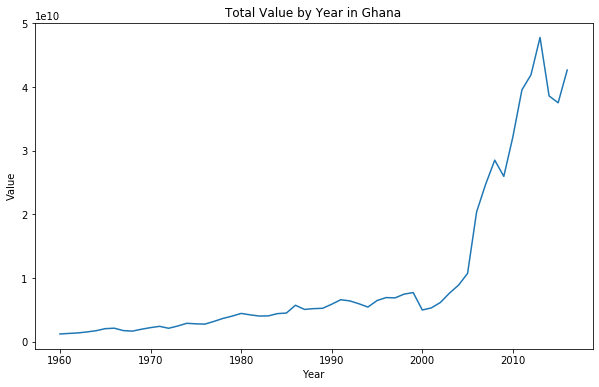

In [77]:
# 4. What is the total value for each year in Ghana?
ghana_total_value_by_year = ghana_data.groupby('Year')['Value'].sum()
print("Total value by year in Ghana:\n", ghana_total_value_by_year)

# Line plot: Total Value by Year in Ghana
plt.figure(figsize=(10, 6))
plt.plot(ghana_total_value_by_year.index, ghana_total_value_by_year.values)
plt.title("Total Value by Year in Ghana")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

In [75]:
# Filter data for Ghana
ghana_data = west_africa_df[west_africa_df['Country Name'] == 'Ghana']

# Filter data for Nigeria
nigeria_data = west_africa_df[west_africa_df['Country Name'] == 'Nigeria']

# 1. What are the unique years available for Ghana and Nigeria?
ghana_unique_years = ghana_data['Year'].unique()
nigeria_unique_years = nigeria_data['Year'].unique()
print("Unique years available for Ghana:", ghana_unique_years)
print("Unique years available for Nigeria:", nigeria_unique_years)


Unique years available for Ghana: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]
Unique years available for Nigeria: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]


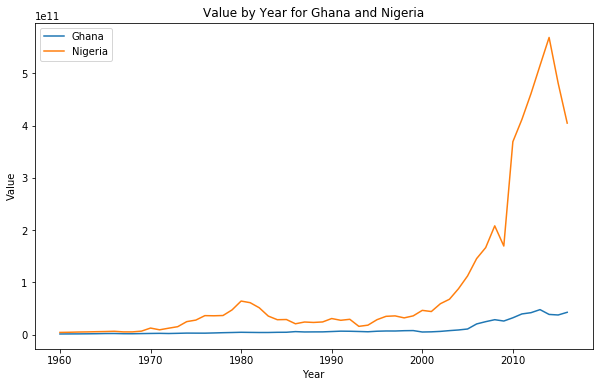

In [76]:
# 2. What is the value for Ghana and Nigeria in each year?
ghana_value_by_year = ghana_data.groupby('Year')['Value'].sum()
nigeria_value_by_year = nigeria_data.groupby('Year')['Value'].sum()

# Line plot: Value by Year for Ghana and Nigeria
plt.figure(figsize=(10, 6))
plt.plot(ghana_value_by_year.index, ghana_value_by_year.values, label='Ghana')
plt.plot(nigeria_value_by_year.index, nigeria_value_by_year.values, label='Nigeria')
plt.title("Value by Year for Ghana and Nigeria")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()